Realizarei un EDA sobre a evolución da NBA nos ultimos anos.

Para esto usarei un dataset que conten todas as estadisticas dos xogadores dende tempada 96-97 ata a 20-21

Url donde atopar o dataset: https://www.kaggle.com/justinas/nba-players-data

# Importacions

In [70]:
import math;
import numpy  as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

# Lectura e visualizacion dos datos

In [71]:
#Jupyter
#nba = pd.read_csv('all_seasons.csv', index_col = 0)

#Google colab
from google.colab import drive;
drive.mount('/content/drive')
nba = pd.read_csv("/content/drive/MyDrive/SIBG/all_seasons.csv", index_col = 0)

pd.set_option('display.max_columns', None)
nba.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,29,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,6,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,Undrafted,71,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,Undrafted,74,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,25,42,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


In [3]:
nba.shape

(11700, 21)

In [4]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11700 entries, 0 to 11699
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        11700 non-null  object 
 1   team_abbreviation  11700 non-null  object 
 2   age                11700 non-null  float64
 3   player_height      11700 non-null  float64
 4   player_weight      11700 non-null  float64
 5   college            11700 non-null  object 
 6   country            11700 non-null  object 
 7   draft_year         11700 non-null  object 
 8   draft_round        11700 non-null  object 
 9   draft_number       11700 non-null  object 
 10  gp                 11700 non-null  int64  
 11  pts                11700 non-null  float64
 12  reb                11700 non-null  float64
 13  ast                11700 non-null  float64
 14  net_rating         11700 non-null  float64
 15  oreb_pct           11700 non-null  float64
 16  dreb_pct           117

In [5]:
nba.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000
mean,27.131966,200.728501,100.526791,51.717179,8.169299,3.564957,1.811179,-2.166410,0.054981,0.141534,0.185380,0.510402,0.131228
std,4.340006,9.169827,12.526481,24.985236,5.956115,2.487498,1.792117,12.076914,0.043595,0.062793,0.052957,0.098306,0.094244
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,32.000000,3.600000,1.800000,0.600000,-6.300000,0.021000,0.096000,0.150000,0.479000,0.065000
50%,26.000000,200.660000,99.790240,58.000000,6.700000,3.000000,1.200000,-1.300000,0.042000,0.132000,0.182000,0.523000,0.103000
75%,30.000000,208.280000,108.862080,74.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.218000,0.559000,0.178000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [6]:
nba_org = nba

nba_org.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,29,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,6,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,Undrafted,71,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,Undrafted,74,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,25,42,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


## Datos nulos

Comprobamos se existen ou non valores nulos no dataset

In [7]:
def valoresNulos(datos):
    total = datos.isnull().sum().sort_values(ascending=False)
    percent = (datos.isnull().sum()/datos.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis = 1, keys=['Total', 'Percent'])
    
    return missing_data.head(22)

In [8]:
valoresNulos(nba)

,Total,Percent
player_name,0,0.0
pts,0,0.0
ast_pct,0,0.0
ts_pct,0,0.0
usg_pct,0,0.0
dreb_pct,0,0.0
oreb_pct,0,0.0
net_rating,0,0.0
ast,0,0.0
reb,0,0.0


In [9]:
nba.nunique(axis=0)

player_name          2333
team_abbreviation      36
age                    27
player_height          30
player_weight         157
college               336
country                79
draft_year             46
draft_round             9
draft_number           76
gp                     85
pts                   311
reb                   152
ast                   115
net_rating            729
oreb_pct              216
dreb_pct              352
usg_pct               341
ts_pct                542
ast_pct               479
season                 25
dtype: int64

In [10]:
print(f'Total de filas duplicadas: {nba.duplicated().sum()}')

Total de filas duplicadas: 0


# Analise dos datos

##Analise das nacionalidades

### Comprobacion con todo o dataset

####Limpeza de duplicados

Antes de comezar a analizar as nacionalidades dos xogadores vamos a eliminar os duplicados, cada xogador pode aparecer varias veces no dataframe xa que puideron xogar mais dunha tempada. Creo o dataframe xogador_pais onde so terei player_name e country e borrarei os duplicados

In [11]:
xogador_pais = nba[['player_name', 'country']]
print(f'Total de filas duplicadas: {xogador_pais.duplicated().sum()}')

Total de filas duplicadas: 9359


In [12]:
xogador_pais_limpo = xogador_pais.drop_duplicates()

print(f'Total de filas duplicadas: {xogador_pais_limpo.duplicated().sum()}')

Total de filas duplicadas: 0


In [13]:
xogador_pais_limpo.shape

(2341, 2)

####Analise

In [14]:
xogador_pais_limpo['country'].value_counts()

USA           1971
Canada          36
France          31
Australia       17
Croatia         15
              ... 
Ireland          1
USSR             1
Scotland         1
Sudan (UK)       1
Guinea           1
Name: country, Length: 79, dtype: int64

In [15]:
xogador_pais_limpo['country'].unique()

array(['USA', 'Jamaica', 'Serbia and Montenegro', 'Ukraine', 'Canada',
       'Croatia', 'Lithuania', 'Nigeria', 'Congo',
       'St. Vincent & Grenadines', 'US Virgin Islands', 'France',
       'Slovenia', 'Dominican Republic', 'Germany', 'Georgia',
       'New Zealand', 'Belize', 'England', 'Argentina',
       'U.S. Virgin Islands', 'Greece', 'Senegal', 'China', 'Turkey',
       'Finland', 'Mali', 'Puerto Rico', 'Mexico', 'Yugoslavia', 'Serbia',
       'Spain', 'Venezuela', 'Haiti', 'Russia', 'Ireland', 'Brazil',
       'Scotland', 'Poland', 'Netherlands', 'Czech Republic',
       'Montenegro', 'United Kingdom', 'Democratic Republic of the Congo',
       'Latvia', 'South Korea', 'Uruguay', 'Sudan (UK)', 'Australia',
       'USSR', 'Italy', 'Switzerland', 'Gabon', 'Cameroon', 'Iran',
       'Israel', 'Sweden', 'Tanzania', 'Panama', 'Bosnia',
       'Great Britain', 'Macedonia', 'Bosnia & Herzegovina', 'Cabo Verde',
       'Tunisia', 'South Sudan', 'Bahamas', 'Ghana', 'Austria',
      

In [16]:
usa = xogador_pais_limpo[xogador_pais_limpo['country'] == 'USA'].count().country
no_usa = xogador_pais_limpo[xogador_pais_limpo['country'] != 'USA'].count().country

total = usa+no_usa

pct_usa = round(100 * (usa / total), 2)
pct_no_usa = round(100 * (no_usa / total), 2)

print(pct_usa, pct_no_usa)

84.19 15.81


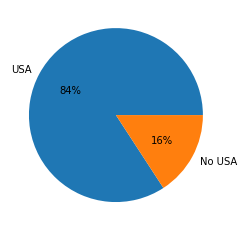

In [17]:
data = [pct_usa, pct_no_usa]

labels = ['USA', 'No USA'] 

plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

###Comprobacion da tempada 96-97

In [18]:
usa97 = nba[(nba['country'] == 'USA') & (nba['season'] == '1996-97')].count().country
no_usa97 = nba[(nba['country'] != 'USA') & (nba['season'] == '1996-97')].count().country

total = usa97 + no_usa97

pct_usa97 = round(100 * (usa97 / total), 2)
pct_no_usa97 = round(100 * (no_usa97 / total), 2)

print(pct_usa97, pct_no_usa97)

97.96 2.04


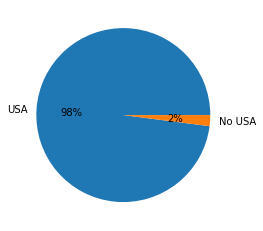

In [19]:
data = [pct_usa97, pct_no_usa97]

labels = ['USA', 'No USA'] 

plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

###Comprobacion da tempada 20-21

In [20]:
usa20 = nba[(nba['country'] == 'USA') & (nba['season'] == '2020-21')].count().country
no_usa20 = nba[(nba['country'] != 'USA') & (nba['season'] == '2020-21')].count().country

total = usa20 + no_usa20

pct_usa20 = round(100 * (usa20 / total), 2)
pct_no_usa20 = round(100 * (no_usa20 / total), 2)

print(pct_usa20, pct_no_usa)

77.04 15.81


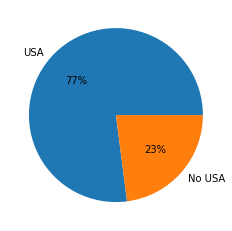

In [21]:
data = [pct_usa20, pct_no_usa20]

labels = ['USA', 'No USA'] 

plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

###Tempada a tempada

In [22]:
tempada = nba[['player_name', 'country', 'season']]

tempada.loc[tempada.country != 'USA', 'country'] = 'No USA'

tempada


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,player_name,country,season
0,Travis Knight,USA,1996-97
1,Matt Fish,USA,1996-97
2,Matt Bullard,USA,1996-97
3,Marty Conlon,USA,1996-97
4,Martin Muursepp,USA,1996-97
...,...,...,...
11695,Matthew Dellavedova,No USA,2020-21
11696,Maurice Harkless,USA,2020-21
11697,Max Strus,USA,2020-21
11698,Marcus Morris Sr.,USA,2020-21


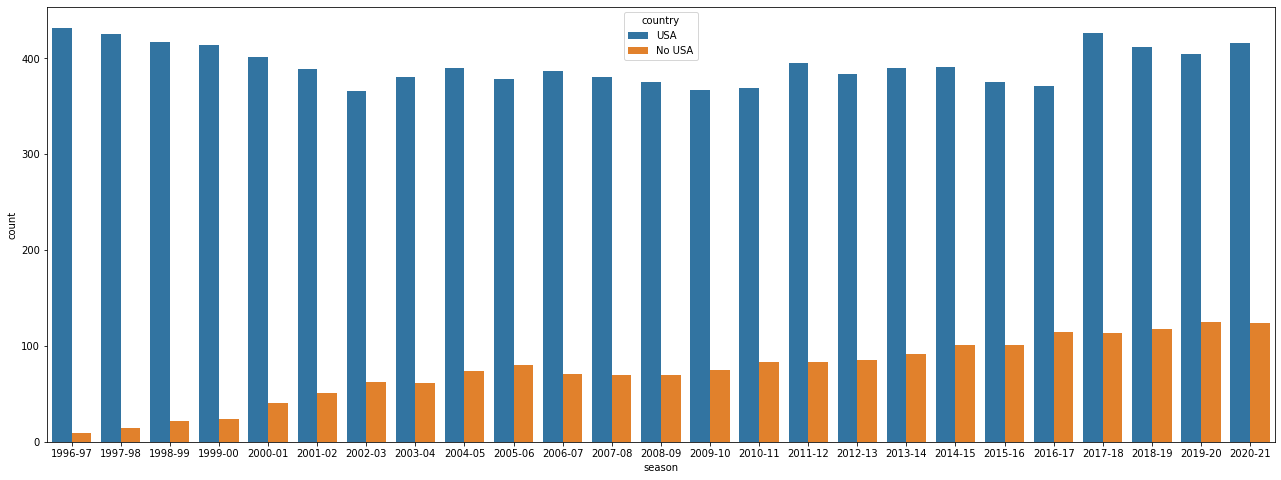

In [23]:
plt.figure(figsize=(22,8))
sns.countplot(data=tempada, x = 'season', hue = 'country')

###Resto de paises

In [24]:
resto = xogador_pais_limpo[xogador_pais_limpo['country'] != 'USA']

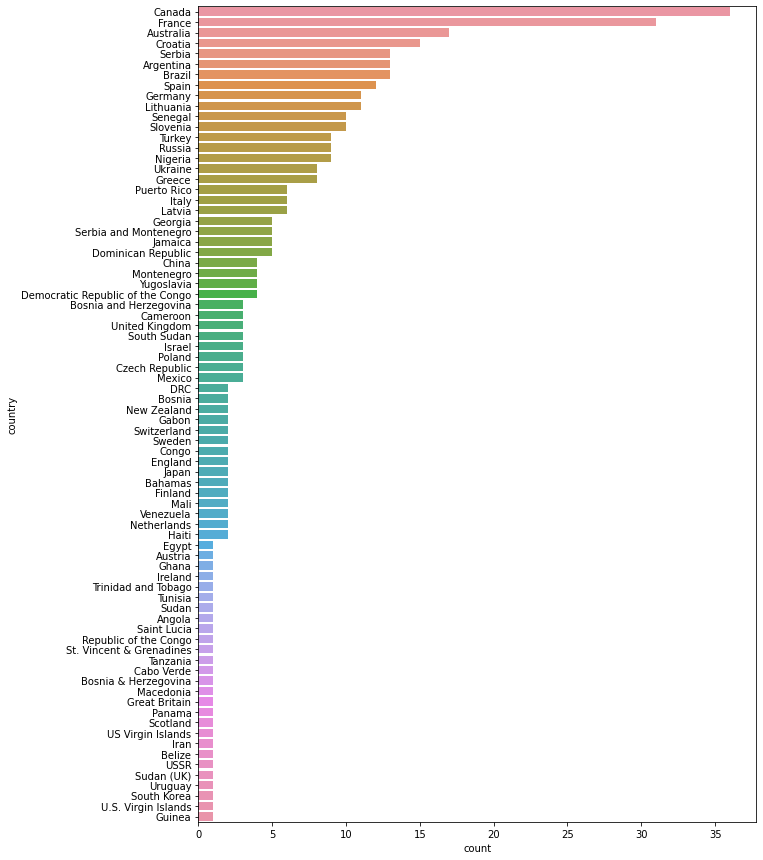

In [25]:
plt.figure(figsize=(10,15))
sns.countplot(data=resto, y="country", order = resto['country'].value_counts().index)
plt.show()

##Altura e peso

### Graficas da altura e o peso

In [26]:
altura_peso = nba.groupby('player_name').agg({'player_height': 'mean', 'player_weight':'mean'})

In [27]:
corr_matrix = altura_peso.corr()

corr_matrix

,player_height,player_weight
player_height,1.000000,0.825004
player_weight,0.825004,1.000000


Como era de esperar existe unha importante correlacion entre a altura e o peso dos xogadores

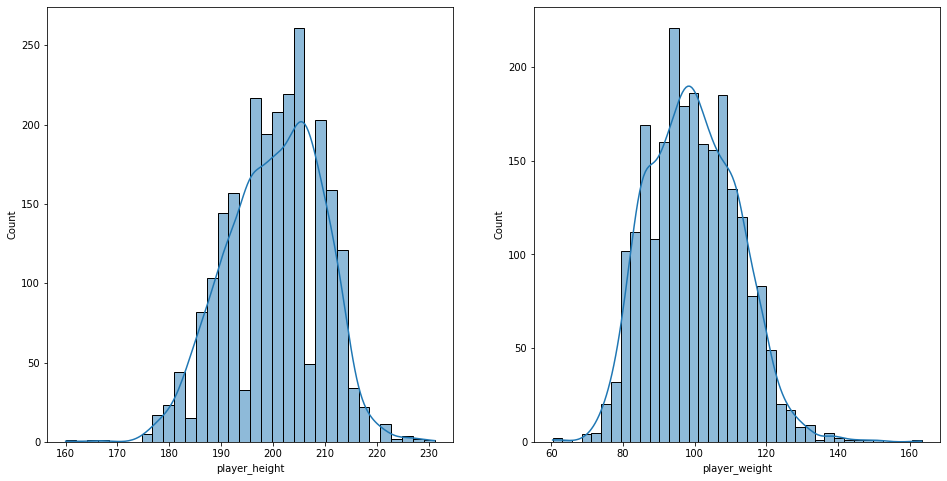

In [29]:
fig, ax = plt.subplots(1,2,figsize=(16, 8))

sns.histplot(altura_peso['player_height'], kde=True, ax=ax[0])
sns.histplot(altura_peso['player_weight'], kde=True, ax=ax[1])

### Relacion altura-peso

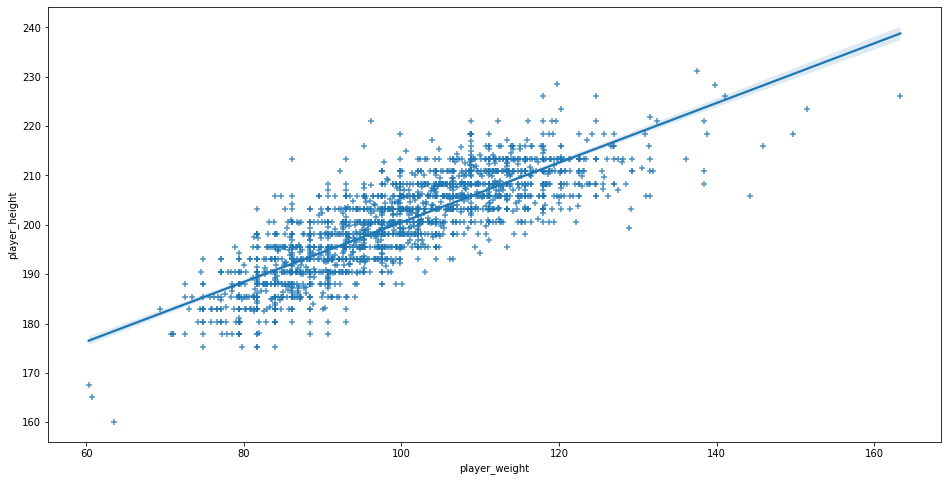

In [30]:
plt.figure(figsize=(16, 8))

sns.regplot(x='player_weight', y='player_height', data=altura_peso, marker='+')

### Indice de masa corporal

In [31]:
nba['IMC'] = nba['player_weight'].values / ((nba['player_height'].values/100) ** 2)
nba

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,IMC
0,Travis Knight,LAL,22.0,213.36,106.594120,Connecticut,USA,1996,1,29,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97,23.415705
1,Matt Fish,MIA,27.0,210.82,106.594120,North Carolina-Wilmington,USA,1992,2,50,6,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97,23.983338
2,Matt Bullard,HOU,30.0,208.28,106.594120,Iowa,USA,Undrafted,Undrafted,Undrafted,71,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97,24.571864
3,Marty Conlon,BOS,29.0,210.82,111.130040,Providence,USA,Undrafted,Undrafted,Undrafted,74,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97,25.003906
4,Martin Muursepp,DAL,22.0,205.74,106.594120,None,USA,1996,1,25,42,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97,25.182322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,Matthew Dellavedova,CLE,30.0,190.50,90.718400,St.Mary's College of California,Australia,Undrafted,Undrafted,Undrafted,13,2.8,1.8,4.5,-3.1,0.029,0.085,0.125,0.312,0.337,2020-21,24.998009
11696,Maurice Harkless,SAC,28.0,200.66,99.790240,St. John's,USA,2012,1,15,37,5.2,2.4,1.2,-2.9,0.017,0.097,0.114,0.527,0.071,2020-21,24.783718
11697,Max Strus,MIA,25.0,195.58,97.522280,DePaul,USA,Undrafted,Undrafted,Undrafted,39,6.1,1.1,0.6,-4.2,0.011,0.073,0.179,0.597,0.074,2020-21,25.494997
11698,Marcus Morris Sr.,LAC,31.0,203.20,98.883056,Kansas,USA,2011,1,14,57,13.4,4.1,1.0,4.2,0.025,0.133,0.194,0.614,0.056,2020-21,23.948288


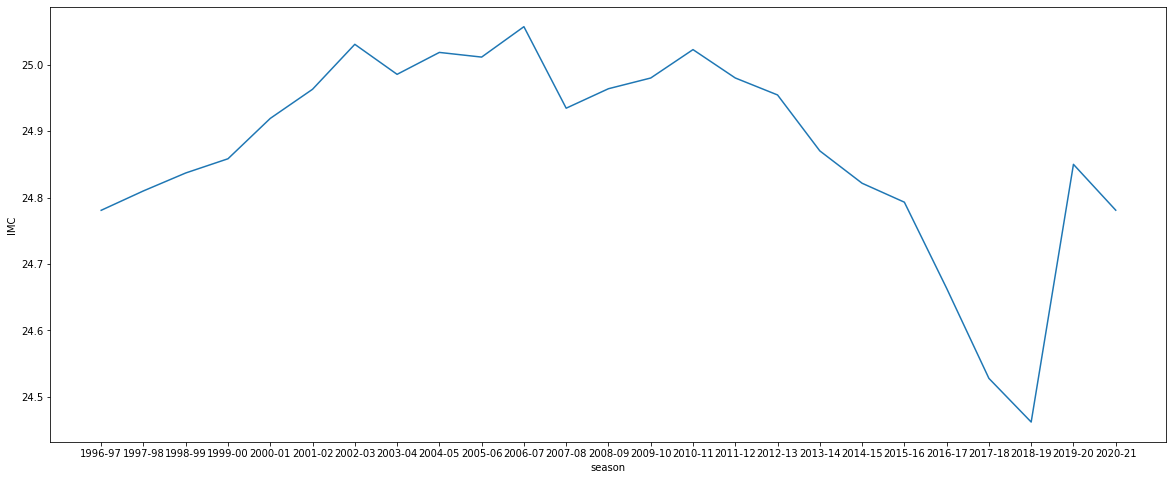

In [32]:
plt.figure(figsize=(20, 8))

sns.lineplot(x=nba['season'], y='IMC', data=nba, ci=None)

Vamos analizar ese aumento brusco entre as tempadas 2018-19 e 2019-20

In [33]:
imc = nba[['player_name', 'season', 'IMC']]
imc18_19 = imc[imc['season'] == '2018-19'].sort_values('IMC',ascending=False)
imc19_20 = imc[imc['season'] == '2019-20'].sort_values('IMC',ascending=False)

In [34]:
imc18_19.head(10)

,player_name,season,IMC
10364,Alan Williams,2018-19,29.111451
10401,Deonte Burton,2018-19,29.052438
10614,Guerschon Yabusele,2018-19,28.562178
10361,Andre Drummond,2018-19,28.473835
10511,Jared Terrell,2018-19,28.372740
10141,P.J. Tucker,2018-19,28.312279
10557,Jahlil Okafor,2018-19,28.065608
10191,Marcus Derrickson,2018-19,28.050662
10223,Tyler Davis,2018-19,27.813259
10408,Derrick Favors,2018-19,27.708698


In [35]:
imc19_20.head(10)

,player_name,season,IMC
10989,Zion Williamson,2019-20,32.819132
10756,Jarrell Brantley,2019-20,29.645345
10689,Eric Paschall,2019-20,29.467882
10848,Deonte Burton,2019-20,29.213394
10812,Andre Drummond,2019-20,29.172554
10933,P.J. Tucker,2019-20,29.052438
10943,Paul Millsap,2019-20,28.951888
10974,Wendell Carter Jr.,2019-20,28.932881
11079,Jusuf Nurkic,2019-20,28.895977
10799,Admiral Schofield,2019-20,28.578113


Vemos que na tempada 2019-20 chegaron xogadores con un IMC que subiu moito a media.

##Draft

### Primeiro visual

In [36]:
nba.college.unique()

array(['Connecticut', 'North Carolina-Wilmington', 'Iowa', 'Providence',
       'None', 'Seward County Community College', 'Old Dominion',
       'Temple', 'Georgia Tech', "St. John's (NY)", 'Washington State',
       'Texas Tech', 'Seton Hall', 'American International',
       'Massachusetts', 'Murray State', 'Drexel', 'Louisiana State',
       'Long Beach State', 'New Mexico', 'Michigan', 'Pennsylvania',
       'Michigan State', 'Missouri', 'Louisville', 'Georgetown',
       'Louisiana Tech', 'Arkansas', 'Virginia', 'Cincinnati', 'Illinois',
       'North Carolina State', 'Montevallo', 'Stetson', 'Wake Forest',
       'West Florida', 'Notre Dame', 'UCLA', 'Kansas State',
       'George Washington', 'North Carolina', 'Xavier', 'Wisconsin',
       'Georgia Southern', 'San Diego State', 'Oklahoma', 'Memphis',
       'Mt. San Antonio', 'Alabama', 'Arizona', 'Richmond', 'Syracuse',
       'Gonzaga', 'Oklahoma State', 'Detroit Mercy',
       'Arkansas-Little Rock', 'Maryland', 'McNeese Sta

In [37]:
nba.draft_year.unique()

array(['1996', '1992', 'Undrafted', '1995', '1983', '1986', '1987',
       '1988', '1985', '1990', '1993', '1991', '1989', '1984', '1994',
       '1978', '1982', '1981', '1976', '1980', '1979', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '1963', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype=object)

In [38]:
nba.draft_round.unique()

array(['1', '2', 'Undrafted', '7', '3', '6', '4', '8', '0'], dtype=object)

In [39]:
nba.draft_number.unique()

array(['29', '50', 'Undrafted', '25', '30', '18', '31', '48', '21', '160',
       '2', '46', '14', '44', '3', '28', '7', '13', '42', '52', '1', '9',
       '22', '8', '37', '11', '12', '33', '24', '5', '69', '35', '10',
       '38', '16', '6', '39', '32', '4', '19', '23', '36', '63', '20',
       '41', '26', '47', '15', '124', '43', '51', '40', '56', '17', '54',
       '139', '127', '27', '75', '165', '45', '57', '53', '34', '49',
       '79', '58', '66', '87', '120', '55', '82', '60', '59', '78', '0'],
      dtype=object)

Podemos ver alguns datos interesantes de analizar, o draft da NBA, dende 1989, conta con so 2 rondas, no noso dataset podemos ver que temos ronda 3, 4, 6, 7, 8 e 0. Por outro lado, o numero de xogadores dende o 1989 esta sobre os 54-60 mais ou menos e podemos ver que temos xogadores elexidos en posicion como a 120 ou 165 neste dataset, polo que todos estes datos 'extraños' poden tratarse de erros. 

Por outro lado, como o dataset comeza na tempada 1996-97 vou a borrar todos os xogadores drafteados antes da tempada 96, asi teremos a todas as clases do draft completas e todas as tempadas deses xogadores na NBA.

Asique todos os xogadores do 96 para atras non estaran no analise.

In [40]:
nba.drop(nba[nba.draft_year<='1995'].index, inplace=True)

### Ronda 0

Comprobamos que os xogadores elexidos na ronda 0 son recentes, McConnell ten 'Undrafted' na columna 'draft_number' e podemos comprobar en google que tanto Pargo como Magette non foron drafteados. Polo tanto a estes xogadores cambiaremoslles o 0 que aparece por Undrafted, en ambas as duas columnas

In [42]:
nba[nba['draft_round'] == '0']

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,IMC
10705,Jeremy Pargo,GSW,34.0,187.96,99.336648,Gonzaga,USA,2009,0,0,3,8.3,1.0,2.7,2.4,0.024,0.048,0.268,0.557,0.308,2019-20,28.117625
10926,T.J. McConnell,IND,28.0,185.42,86.182480,Arizona,USA,2015,0,Undrafted,71,6.5,2.7,5.0,1.1,0.028,0.107,0.167,0.540,0.354,2019-20,25.067200
11063,Josh Magette,ORL,30.0,185.42,72.574720,Alabama Huntsville,USA,2012,0,0,8,1.5,0.8,0.6,2.4,0.022,0.128,0.226,0.378,0.238,2019-20,21.109221
11540,T.J. McConnell,IND,29.0,185.42,86.182480,Arizona,USA,2015,0,Undrafted,69,8.6,3.7,6.6,2.5,0.030,0.106,0.149,0.583,0.337,2020-21,25.067200


In [43]:
nba.loc[nba.draft_round == '0', 'draft_round'] = 'Undrafted'

In [44]:
nba.loc[nba.draft_number == '0', 'draft_number'] = 'Undrafted'

In [45]:
nba[nba['player_name'] == 'Josh Magette']

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,IMC
9629,Josh Magette,ATL,28.0,185.42,72.57472,Alabama Huntsville,USA,Undrafted,Undrafted,Undrafted,18,2.6,1.1,3.2,-0.5,0.009,0.079,0.119,0.464,0.370,2017-18,21.109221
11063,Josh Magette,ORL,30.0,185.42,72.57472,Alabama Huntsville,USA,2012,Undrafted,Undrafted,8,1.5,0.8,0.6,2.4,0.022,0.128,0.226,0.378,0.238,2019-20,21.109221


###Resto das rondas extrañas

In [46]:
nba.draft_round.unique()

array(['1', 'Undrafted', '2', '4'], dtype=object)

Ao borrar todos os xogadores que foron drafteados antes do 1996 o resto de rondas extrañas xa foi eliminado, so queda a ronda 4 que vou analizar para ver que ocorre con ela

In [47]:
nba[nba['draft_round'] == '4']

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,IMC
3533,Mark Jones,ORL,30.0,198.12,97.52228,Central Florida,USA,2004,4,82,10,2.3,1.3,0.6,-0.4,0.05,0.067,0.133,0.325,0.075,2004-05,24.845469


Estamos ante un erro no dataset, no 2004 non habia mais de duas rondas no draft, comprobando en google vemos que Mark Jones non foi drafteado no seu ano.

In [48]:
nba.loc[nba.player_name == 'Mark Jones', 'draft_year'] = 'Undrafted'

In [49]:
nba.loc[nba.player_name == 'Mark Jones', 'draft_round'] = 'Undrafted'

In [50]:
nba.loc[nba.player_name == 'Mark Jones', 'draft_number'] = 'Undrafted'

In [51]:
nba[nba['player_name'] == 'Mark Jones']

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,IMC
3533,Mark Jones,ORL,30.0,198.12,97.52228,Central Florida,USA,Undrafted,Undrafted,Undrafted,10,2.3,1.3,0.6,-0.4,0.05,0.067,0.133,0.325,0.075,2004-05,24.845469


### Ano Undrafted

Podemos comprobar que hai xogadores que non foron drafteados que teñen Undrafted en draft_year e outros que teñen o ano do draft ao que se presentaron, tomei a decision de quitar esta columna e crear unha nova que indique con un 1 se foron drafteados e con un 0 se non o foron.

In [52]:
nba = nba.drop(columns=['draft_year'])

In [53]:
nba['drafted'] = nba.draft_round.apply(lambda x: 0 if x == 'Undrafted' else 1)

In [54]:
nba.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,IMC,drafted
0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1,29,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97,23.415705,1
2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,71,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97,24.571864,0
3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,74,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97,25.003906,0
4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1,25,42,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97,25.182322,1
7,Mark Strickland,MIA,26.0,208.28,99.79024,Temple,USA,Undrafted,Undrafted,31,2.0,1.2,0.0,-17.1,0.109,0.152,0.232,0.448,0.013,1996-97,23.003448,0


In [55]:
#Movo a columna a antiga posicion de draft_year
column = nba.pop('drafted')

nba.insert(7, 'drafted', column)

nba.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,drafted,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,IMC
0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1,1,29,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97,23.415705
2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,0,Undrafted,Undrafted,71,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97,24.571864
3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,0,Undrafted,Undrafted,74,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97,25.003906
4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1,1,25,42,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97,25.182322
7,Mark Strickland,MIA,26.0,208.28,99.79024,Temple,USA,0,Undrafted,Undrafted,31,2.0,1.2,0.0,-17.1,0.109,0.152,0.232,0.448,0.013,1996-97,23.003448


###Graficas

####College

Como vimos anteriormente existen xogadores que teñen None en college, estos xogadores son sobre todo extranxeiros ou xogadores que non chegaron a ir a universidade en USA polo que vamos a ignoralos para analizar as universidades que mais xogadores aportan. 

In [ ]:
nba[nba['college'] == 'None']

,player_name,team_abbreviation,age,player_height,player_weight,college,country,drafted,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,IMC
4,Martin Muursepp,DAL,22.0,205.74,106.594120,None,USA,1,1,25,42,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97,25.182322
13,Mark Bradtke,PHI,28.0,208.28,120.201880,None,USA,0,Undrafted,Undrafted,36,1.6,1.9,0.2,0.9,0.107,0.176,0.118,0.463,0.043,1996-97,27.708698
96,Kobe Bryant,LAL,18.0,200.66,90.718400,None,USA,1,1,13,71,7.6,1.9,1.3,2.2,0.048,0.084,0.244,0.544,0.144,1996-97,22.530652
125,Stojko Vrankovic,MIN,33.0,218.44,117.933920,None,USA,0,Undrafted,Undrafted,53,3.4,3.2,0.3,-7.1,0.089,0.169,0.125,0.583,0.028,1996-97,24.715784
201,Shane Heal,MIN,26.0,182.88,81.646560,None,USA,0,Undrafted,Undrafted,43,1.7,0.4,0.8,-0.7,0.008,0.075,0.204,0.378,0.214,1996-97,24.412118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11672,Luka Doncic,DAL,22.0,200.66,104.326160,None,Slovenia,1,1,3,66,27.7,8.0,8.6,3.9,0.024,0.202,0.350,0.587,0.425,2020-21,25.910250
11673,Luka Samanic,SAS,21.0,208.28,102.965384,None,Croatia,1,1,19,33,3.7,2.1,0.5,-2.0,0.049,0.158,0.187,0.518,0.073,2020-21,23.735375
11679,Malik Fitts,LAC,23.0,203.20,104.326160,None,USA,0,Undrafted,Undrafted,3,1.0,1.0,0.0,-27.3,0.000,0.300,0.120,0.500,0.000,2020-21,25.266542
11682,LeBron James,LAL,36.0,205.74,113.398000,None,USA,1,1,1,45,25.0,7.7,7.8,9.2,0.020,0.202,0.310,0.602,0.394,2020-21,26.789705


In [ ]:
college = nba.drop(nba[nba.college == 'None'].index)

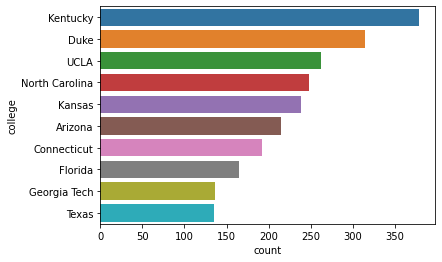

In [ ]:
sns.countplot(data=college, y="college", order = college['college'].value_counts().iloc[:10].index) #Mostro o top 10 de universidades que mais xogadores aportan

Kentucky, Duke e UCLA son as universidades que mais xogadores aportan.

#### Estadisticas por draft_number

Agora que xa temos unha visión xeral e limpo a parte do draft vamos analizar as estadisticas dos xogadores segundo a posición e comprobar como canto antes foran elexidos no draft mellores xogadores foron.

In [ ]:
nba.draft_number.unique()

array(['29', 'Undrafted', '25', '31', '2', '46', '44', '30', '33', '7',
       '18', '13', '8', '28', '19', '12', '15', '38', '4', '11', '16',
       '56', '5', '42', '26', '3', '54', '22', '9', '17', '51', '6', '49',
       '1', '27', '43', '37', '41', '48', '24', '10', '57', '21', '36',
       '32', '53', '45', '23', '47', '39', '50', '34', '20', '35', '52',
       '14', '40', '55', '58', '60', '59'], dtype=object)

In [ ]:
#Cambio undrafted polo numero 61 que representará aos xogadores que non foron drafteados
#desta maneira teño toda a columna draftnumber numerica.
nba['draft_number'].replace('Undrafted','61',inplace=True)
nba['draft_number'] = pd.to_numeric(nba['draft_number'])

In [ ]:
#Analizarei so as estadisticas mais basicas da NBA que son partidos xogados (gp), puntos(pts), rebotes(reb) e asistencias(ast)
stats = ['gp', 'pts', 'reb', 'ast']

#Agrupo por numero do draft e fago unha media das estadisticas para crear un novo dataframe: avg_per_pick
avg_per_pick = nba.groupby(['draft_number'])[stats].mean().reset_index()
avg_per_pick.set_index('draft_number')

,gp,pts,reb,ast
draft_number,,,,
1,60.447699,16.969038,7.132636,3.356485
2,61.082569,12.619266,5.900917,2.353211
3,64.940171,15.501282,5.474359,3.350000
4,61.974576,13.196186,5.122458,3.392373
5,63.240664,12.829046,4.701245,2.965975
...,...,...,...,...
57,51.794872,8.853846,4.148718,2.120513
58,28.769231,3.969231,1.646154,0.669231
59,18.333333,2.966667,1.683333,0.566667


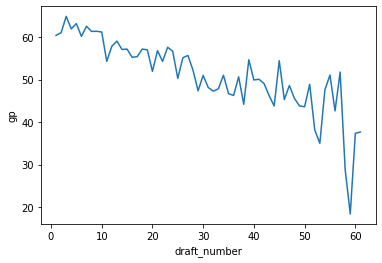

In [ ]:
sns.lineplot(data=avg_per_pick, x="draft_number", y="gp")
plt.show()

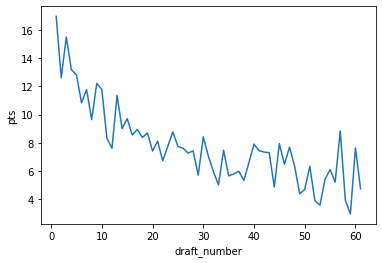

In [ ]:
sns.lineplot(data=avg_per_pick, x="draft_number", y="pts")
plt.show()

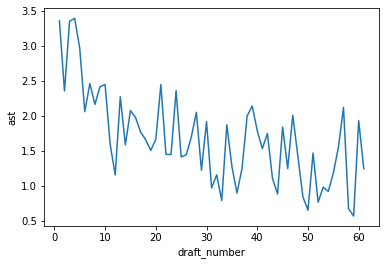

In [ ]:
sns.lineplot(data=avg_per_pick, x="draft_number", y="ast")
plt.show()

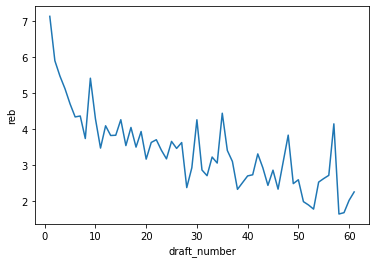

In [ ]:
sns.lineplot(data=avg_per_pick, x="draft_number", y="reb")
plt.show()

##Puntos, rebotes e asistencias

A pesar de que o dataset conta con mais estadisticas vou analizar so os puntos, rebotes e asistencias xa que son as mais faciles de comprender. Voto en falta estadisticas como roubos ou tapons que tamen son moi importantes na NBA.

### Primeiro visual

In [56]:
nba = nba_org

In [57]:
stats = nba.groupby('player_name').agg({'gp': 'sum', 'pts':'mean', 'reb': 'mean', 'ast':'mean'})

In [58]:
stats = stats.sort_values('gp',ascending=False)

In [59]:
stats

,gp,pts,reb,ast
player_name,,,,
Vince Carter,1541,16.345455,4.227273,2.972727
Dirk Nowitzki,1522,20.109524,7.347619,2.338095
Jason Terry,1410,12.884211,2.247368,3.689474
Tim Duncan,1392,18.889474,10.768421,3.010526
Kobe Bryant,1346,24.200000,5.200000,4.760000
...,...,...,...,...
Ratko Varda,1,5.000000,1.000000,0.000000
Elijah Bryant,1,16.000000,6.000000,3.000000
Mark Baker,1,0.000000,0.000000,0.000000


In [60]:
stats['pts_total'] = round(stats.gp * stats.pts)
stats['reb_total'] = round(stats.gp * stats.reb)
stats['ast_total'] = round(stats.gp * stats.ast)

In [61]:
column = stats.pop('pts_total')
stats.insert(2, 'pts_total', column)

column = stats.pop('reb_total')
stats.insert(4, 'reb_total', column)

column = stats.pop('ast_total')
stats.insert(6, 'ast_total', column)

In [62]:
stats.head()

,gp,pts,pts_total,reb,reb_total,ast,ast_total
player_name,,,,,,,
Vince Carter,1541,16.345455,25188.0,4.227273,6514.0,2.972727,4581.0
Dirk Nowitzki,1522,20.109524,30607.0,7.347619,11183.0,2.338095,3559.0
Jason Terry,1410,12.884211,18167.0,2.247368,3169.0,3.689474,5202.0
Tim Duncan,1392,18.889474,26294.0,10.768421,14990.0,3.010526,4191.0
Kobe Bryant,1346,24.200000,32573.0,5.200000,6999.0,4.760000,6407.0


In [63]:
stats.sort_values('pts_total',ascending=False).head(10)

,gp,pts,pts_total,reb,reb_total,ast,ast_total
player_name,,,,,,,
LeBron James,1310,26.933333,35283.0,7.461111,9774.0,7.433333,9738.0
Kobe Bryant,1346,24.200000,32573.0,5.200000,6999.0,4.760000,6407.0
Dirk Nowitzki,1522,20.109524,30607.0,7.347619,11183.0,2.338095,3559.0
Carmelo Anthony,1191,22.500000,26798.0,6.272222,7470.0,2.727778,3249.0
Tim Duncan,1392,18.889474,26294.0,10.768421,14990.0,3.010526,4191.0
Paul Pierce,1343,18.931579,25425.0,5.436842,7302.0,3.357895,4510.0
Vince Carter,1541,16.345455,25188.0,4.227273,6514.0,2.972727,4581.0
Ray Allen,1300,18.883333,24548.0,4.050000,5265.0,3.377778,4391.0
Allen Iverson,914,26.064286,23823.0,3.692857,3375.0,6.000000,5484.0


In [64]:
stats.sort_values('reb_total',ascending=False).head(10)

,gp,pts,pts_total,reb,reb_total,ast,ast_total
player_name,,,,,,,
Tim Duncan,1392,18.889474,26294.0,10.768421,14990.0,3.010526,4191.0
Dwight Howard,1182,15.929412,18829.0,11.858824,14017.0,1.329412,1571.0
Dirk Nowitzki,1522,20.109524,30607.0,7.347619,11183.0,2.338095,3559.0
Pau Gasol,1226,16.561111,20304.0,9.044444,11088.0,3.155556,3869.0
Tyson Chandler,1160,7.821053,9072.0,8.721053,10116.0,0.794737,922.0
Zach Randolph,1116,16.205882,18086.0,8.894118,9926.0,1.805882,2015.0
Ben Wallace,1088,5.393750,5868.0,9.100000,9901.0,1.225000,1333.0
Shawn Marion,1163,14.762500,17169.0,8.500000,9886.0,1.868750,2173.0
LeBron James,1310,26.933333,35283.0,7.461111,9774.0,7.433333,9738.0


In [65]:
stats.sort_values('ast_total',ascending=False).head(10)

,gp,pts,pts_total,reb,reb_total,ast,ast_total
player_name,,,,,,,
Chris Paul,1090,18.287500,19933.0,4.512500,4919.0,9.400000,10246.0
Steve Nash,1217,13.522222,16457.0,2.911111,3543.0,8.161111,9932.0
LeBron James,1310,26.933333,35283.0,7.461111,9774.0,7.433333,9738.0
Andre Miller,1304,12.047059,15709.0,3.576471,4664.0,6.347059,8277.0
Russell Westbrook,943,23.292308,21965.0,7.407692,6985.0,8.492308,8008.0
Rajon Rondo,918,9.940000,9125.0,4.606667,4229.0,8.173333,7503.0
Tony Parker,1254,15.372222,19277.0,2.661111,3337.0,5.588889,7008.0
Deron Williams,845,16.358333,13823.0,3.100000,2620.0,8.025000,6781.0
Kobe Bryant,1346,24.200000,32573.0,5.200000,6999.0,4.760000,6407.0


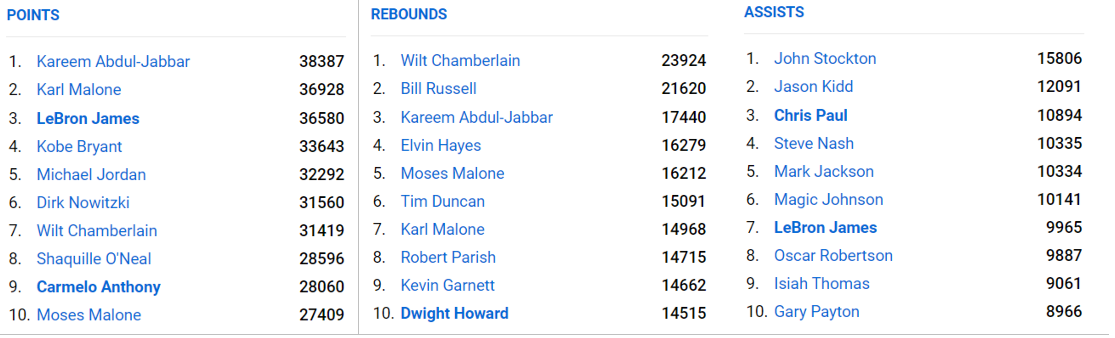


Podemos comprobar na paxina da NBA que os nosos datos obtidos de puntos, rebotes e asistencias totales son moi semellantes aos oficiais, hai que ter en conta que estes datos estan actualizados ata o dia de hoxe. Tamen temos que ter en conta que na imaxe anterior aparecen xogadores xa retirados e que non estan no dataset.

###Gráficas

As posicions no baloncesto son moi importantes a hora de mirar as estadisticas, por exemplo un Center realiza mais rebotes que un Guard ou un Forward.

Decido crear unha columna con 3 valores, Center, para os pivots, Forward, para os ala-pivots e os aleros, e por ultimo Guard para os escoltas e os bases. Para esto tomarei as alturas como guia, os pivot teñen unha altura media de 208 cm e os bases sobre 193 cm. 

In [66]:
nba['position'] = nba.player_height.apply(lambda x: 'Center' if x >= 208 else 'Guard' if x <= 193 else 'Forward')

Grafica dos puntos por posición

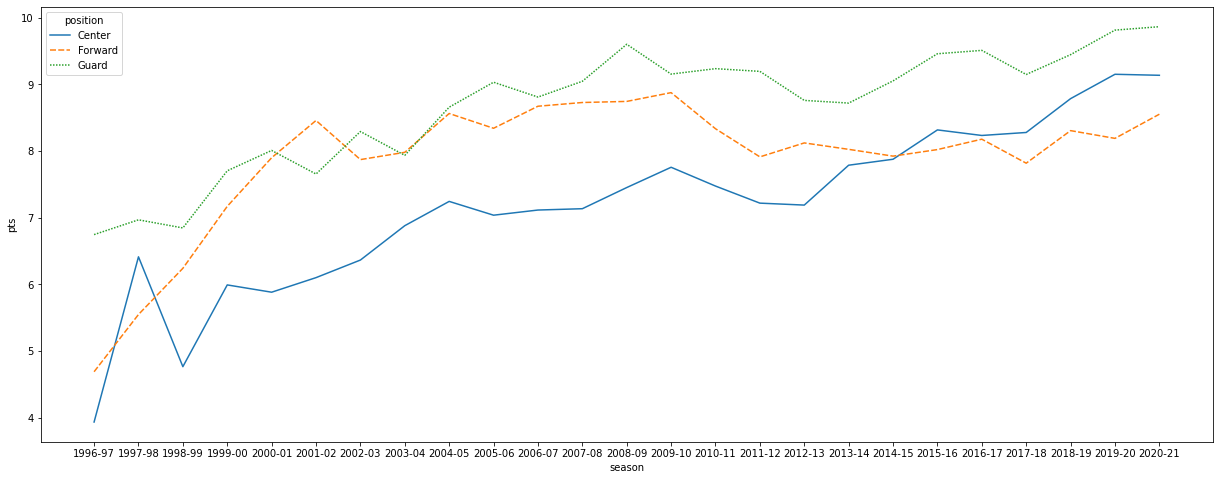

In [67]:
plt.figure(figsize=(21, 8))

sns.lineplot(data=nba, x="season", y="pts", hue="position", style="position", ci=None)

Gráfica dos rebotes por posición

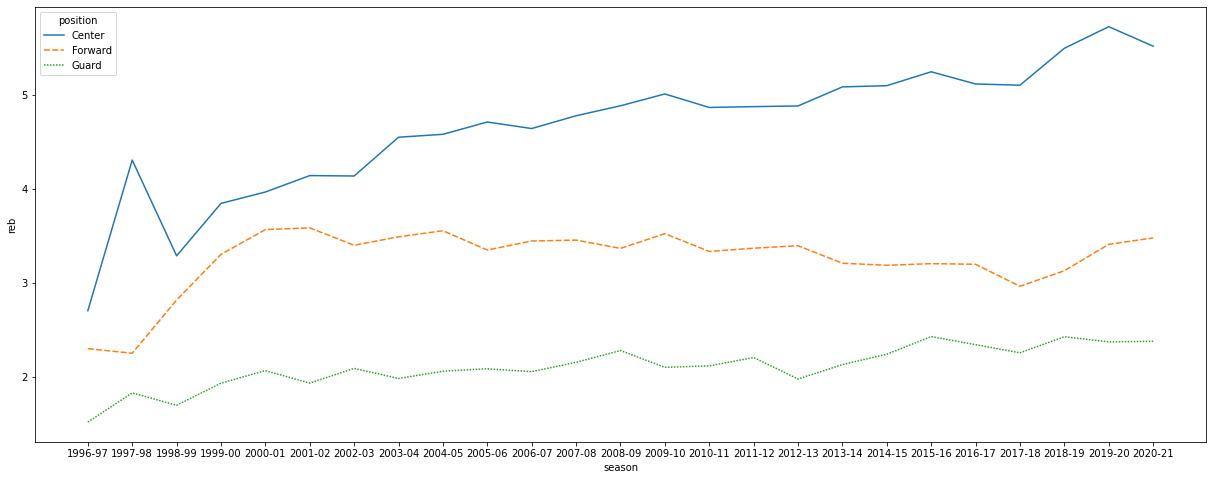

In [68]:
plt.figure(figsize=(21, 8))

sns.lineplot(data=nba, x="season", y="reb", hue="position", style="position", ci=None)

Gráfica das asistencias por posición

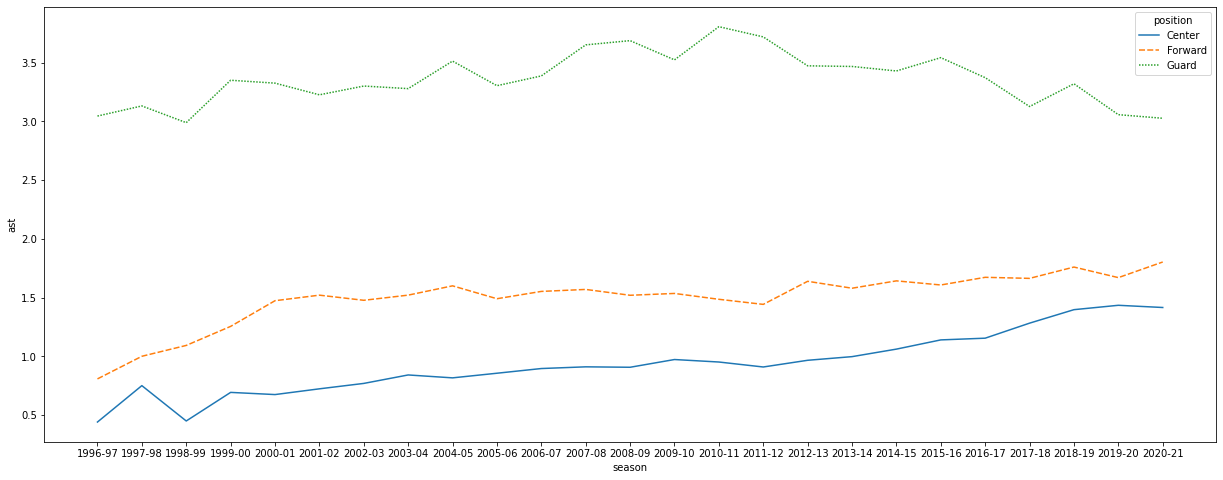

In [69]:
plt.figure(figsize=(21, 8))

sns.lineplot(data=nba, x="season", y="ast", hue="position", style="position", ci=None)

#Conclusións

## Nacionalidades

Podemos ver que como era esperable o numero de xogadores estadounidenses é moi superior ao do resto do mundo, ainda asi tempada tras tempada a cantidade de xogadores do resto do mundo foi en aumento. Na tempada 96-97 vemos que so habia un 2% de xogadores extranxeiros na liga, mentres que na 20-21 o porcentaxe aumentou ata un 23%. A pesar deste aumento de xogadores extranxeiros o numero de xogadores estadounidenses apenas variou cos anos. 

Se comprobamos o resto do mundo, Canadá, Francia e Australia son os seguintes paises que máis xogadores tiveron na NBA.

## Altura e peso

Vemos que existe unha gran cantidade de xogadores entre os 190 e 205 cm aproximadamente, ainda que é curioso os poucos xogadores que hai sobre os 195 cm, tamen se pode ver que entre os 85 e 110 kg está a maioria dos xogadores.

Como era de esperar os xogadores mais altos pesan mais que os mais baixos. 

O indice de masa corporal ascendeu ata a tempada 2006-07 despos pegou un pequeno baixon na seguinte tempada e volveu ascender ata a 2011-12, a partir da temporada 2011-12 o IMC foi descendendo rapidamente cos anos, ata a tempada 2018-19, na seguinte tempada vemos unha gran subida do IMC.

Esa gran subida que vemos é debida a chegada, na tempada 2019-20, de novos xogadores moi grandes como pode ser o caso de Zion Williamson cunha altura de 200 cm e un peso de 128 kg.

##Draft

Podemos ver que existe un numero considerable de xogadores que non foron a universidade en USA que xogaron na NBA, pode ser o caso de LeBron James ou de Kobe Bryant. 

Mirando as estadisticas por posicion do draft, canto antes foi elexido un xogador mellores estadisticas tivo na sua carreira na NBA.

##Estadisticas

Podemos ver nos graficos das estadisticas que foron subindo pouco a pouco tempada tras tempada. 

Os guards son os que máis puntos e asistencias realizan de media. En canto aos rebotes os centers son os que dominan a estadistica con moita diferencia.

Os forwards son xogadores que non destacan en ningunha das estadisticas pero son consistentes en todas as facetas do xogo.